In [23]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/0_Raw_Samples/Trim_QC/allReads/"
folder=glob.glob(InPath+"*R2_fastqc")
len(folder)

73

In [25]:
for i in range(len(folder)):
    pathToFile = folder[i]
    samName = "_".join(pathToFile.split("/")[-1].split("_")[0:4])
    
    pathWithFile = pathToFile + "/fastqc_data.txt"

    started = False
    contents, counts = [], []
    with open(pathWithFile, "r") as f:
        for line in f.readlines():
            if not started:
                spl = [s.strip() for s in line.split()]
                # print(spl)
                if spl == ["#GC", "Content", "Count"]:
                    started = True
            else:
                spl = line.split()
                if spl == [">>END_MODULE"]:
                    break
                assert len(spl) == 2
                content, count = spl
                contents.append(int(content.strip()))
                counts.append(float(count.strip()))
                
    if i==0:
        df_final = pd.DataFrame({
            "GCcontent": contents,
            "Count_" + samName: counts
        })
    else:
        df_merge = pd.DataFrame({
            "GCcontent": contents,
            "Count_" + samName: counts
        })
        
        df_final = df_final.merge(df_merge, on="GCcontent", how="outer")
    #contents_counts = np.stack([contents, counts])

df_final

,GCcontent,Count_RUG_bb_15_1,Count_VU_bn50_0_2,Count_VU_bb_0_5,Count_UVA_anc_0_1,Count_Gent_bb_1_1,Count_NIOO_M00_1_4,Count_VU_bb_0_1,Count_RUG_bb_15_4,Count_VU_bb_1_1,...,Count_VU_bb_15_5,Count_NIOO_A00_1_4,Count_VU_bb_15_2,Count_NIOO_bb_1_4,Count_NIOO_bb_1_1,Count_RUG_bb_15_5,Count_VU_bb_15_1,Count_UVA_anc_0_3,Count_NIOO_bb_1_3,Count_VU_bb_15_3
0,0,531.0,881.0,467.0,595.0,815.0,24.0,857.0,518.0,847.0,...,389.0,66.0,175.0,71.0,479.0,565.0,593.0,761.0,374.0,290.0
1,1,646.0,819.5,585.0,727.0,1038.5,24.5,915.5,655.5,882.0,...,492.0,78.5,229.5,100.0,518.5,683.0,728.5,883.0,460.5,387.0
2,2,753.0,668.0,665.0,885.0,1228.5,27.5,935.5,768.5,905.0,...,601.0,85.5,279.5,118.0,525.0,784.5,845.0,972.0,527.5,492.5
3,3,818.5,673.0,700.0,981.5,1384.0,30.5,1009.0,860.0,970.5,...,685.0,91.0,309.0,129.5,565.0,922.0,912.5,1039.5,599.0,616.5
4,4,1100.0,885.0,938.0,1198.0,1980.0,44.0,1376.0,1231.5,1377.5,...,948.5,129.5,419.5,182.0,750.5,1297.5,1260.0,1342.5,855.5,934.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,2013.5,290.0,2042.5,2163.0,689.5,39.5,2298.0,2479.5,480.0,...,2442.0,126.0,936.0,131.0,203.0,2578.0,1776.0,1722.0,403.5,1376.0
97,97,3408.5,558.5,3412.5,4256.5,1385.5,53.0,3895.0,4119.5,995.5,...,3937.0,227.0,1560.5,247.0,446.0,4274.5,2954.5,3042.5,788.0,2183.0
98,98,5141.5,953.5,5132.0,7076.0,2350.5,88.0,6003.5,6149.0,1704.0,...,5860.5,360.0,2380.5,425.5,791.5,6449.5,4489.0,4556.5,1328.0,3188.0
99,99,11543.0,3390.0,11599.5,20702.5,8573.0,256.5,13881.0,13753.0,5942.5,...,11871.0,1004.0,5092.0,1410.0,3388.0,14195.5,9559.5,10298.0,5062.0,6560.0


/tmp/ipykernel_13982/3380789897.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, df_final_woGCcontent.mean(1), 'k', color='#CC4F1B')


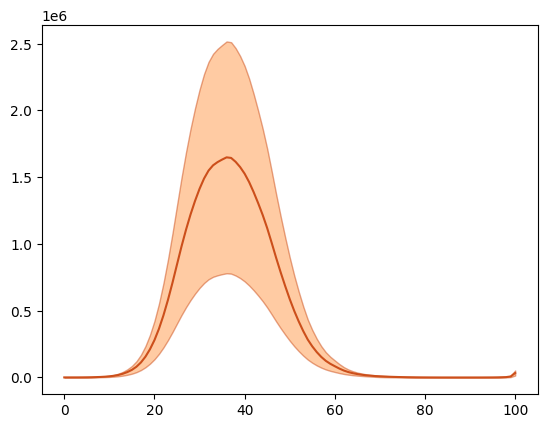

In [26]:
df_final_woGCcontent = df_final.drop(columns="GCcontent")
x = df_final["GCcontent"]
y = df_final_woGCcontent.mean(1)
error = df_final_woGCcontent.std(1)

plt.plot(x, df_final_woGCcontent.mean(1), 'k', color='#CC4F1B')
plt.fill_between(x, y-error, y+error,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')


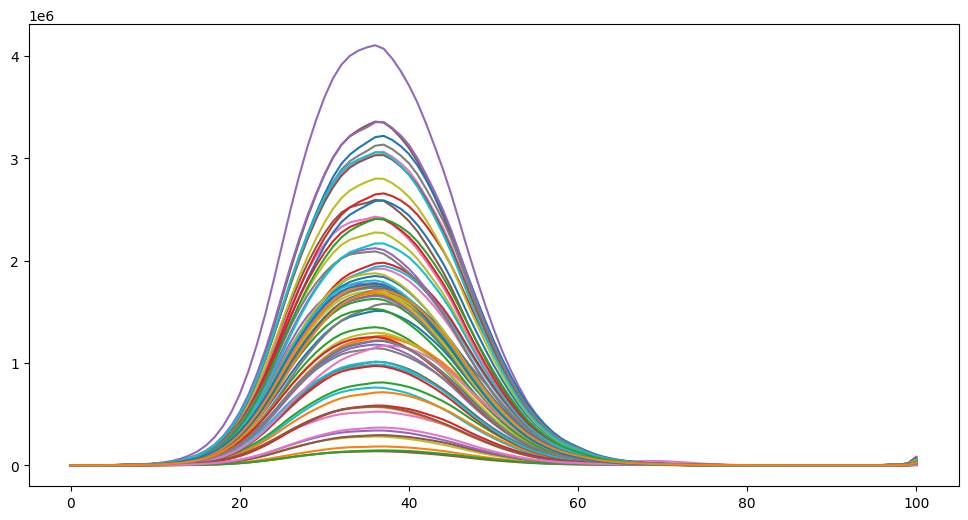

In [27]:

fig, ax = plt.subplots(figsize=[12,6])

for i in range(1,len(folder)):
    ax.plot(x,df_final.iloc[:,i])

In [28]:
#### find curves with specific features:
noSec_below   = 0.5e6 # these have nothing at the between 60 and 80 position
lowSec_below  = 1e6   # low second bump, below 1e6 - start we dont care about
highSec_above = 1e6

collect_Cat = np.empty(len(folder),dtype=str)

for i in range(len(folder)):
    # get numbers from range
    _range = df_final.iloc[60:80,i+1]
    if any(_range >= noSec_below)==True:
        collect_Cat[i] = "h"
    if any(_range >= lowSec_below)==False:
        collect_Cat[i] = "l"
    if any(_range >= noSec_below)==False:
        collect_Cat[i] = "n"
collect_Cat

array(['n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n'], dtype='<U1')

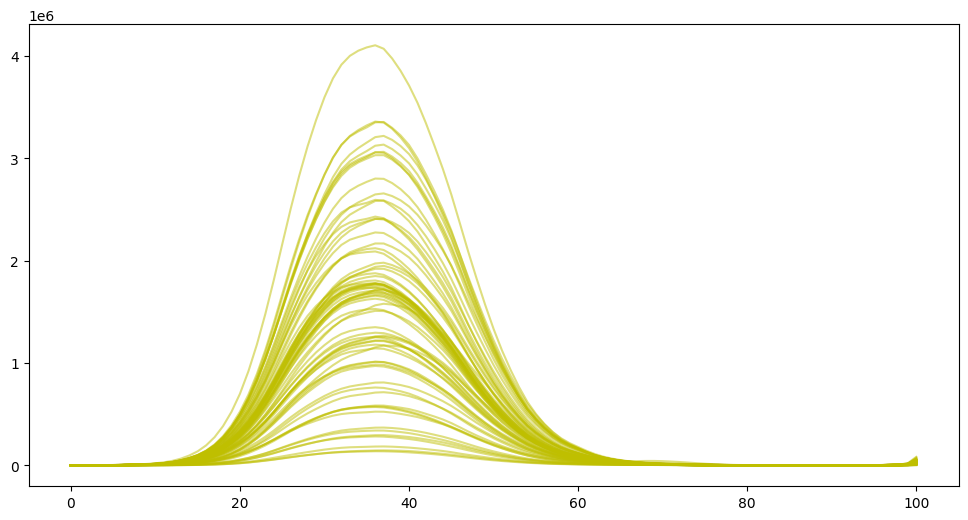

In [29]:
fig, ax = plt.subplots(figsize=[12,6])

for i in range(1,len(folder)):
    if collect_Cat[i-1]=="l":
        ax.plot(x,df_final.iloc[:,i],color="m",alpha=0.3)
    if collect_Cat[i-1]=="h":
        ax.plot(x,df_final.iloc[:,i],color="c",alpha=0.3)
    if collect_Cat[i-1]=="n":
        ax.plot(x,df_final.iloc[:,i],color="y",alpha=0.5)

#plt.savefig('/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/0_Raw_Samples/Trim_QC/' + 'GCcontent_CE.svg',
#            dpi=600)